In [1]:
from utils import *

# Parameters for simulation
env = read_env(jupyter=True)

patientNr = env.patientNr
path = env.path
maxPatient = env.maxPatient
root = env.root
ICR0 = env.ICR0
ndim = env.n_dim
nMeals = env.nMeals



In [8]:
patientNr = 42
patient = Sim.Patient(root = root, patientNr = patientNr, target=6, hypoglycemia=4)
patient.steadyState()

patient.simulate(0, 10, patient.xSS, nsimHours=120, Ts = 5, kappa = 100)
time = np.linspace(0,patient.nSim,patient.nSim)*5/60



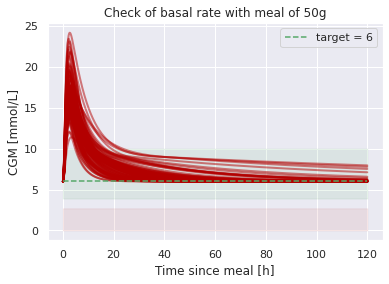

In [9]:
# Check of basal rate

plt.figure()
plt.fill_between(time,3.9+0*time,10+0*time,color='g',alpha=0.1)
plt.fill_between(time,0+0*time,2.7+0*time,color='r',alpha=0.1)

for i in range(100):
    patient = Sim.Patient(root = root, patientNr = i, target=6, hypoglycemia=4)
    patient.steadyState()
    patient.simulate(0, 10, patient.xSS, nsimHours=120, Ts = 5, kappa = 100)
    plt.plot(time,patient.CGM,color=(0.7,0.0,0.0),linewidth=2, alpha = 0.5)

plt.hlines(6,0,120, colors = 'g', label = 'target = 6', linestyles= '--', zorder = 20)
plt.legend()
plt.xlabel('Time since meal [h]')
plt.ylabel('CGM [mmol/L]')
plt.title('Check of basal rate with meal of 50g')
plt.savefig('steady_state_meal.pdf', dpi = 150)
plt.show()


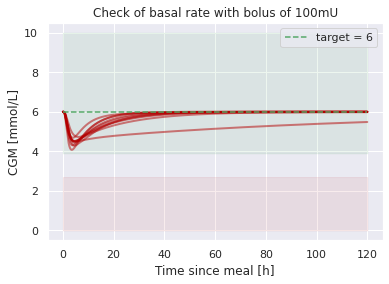

In [10]:
# Check of basal rate - below

plt.figure()
plt.fill_between(time,3.9+0*time,10+0*time,color='g',alpha=0.1)
plt.fill_between(time,0+0*time,2.7+0*time,color='r',alpha=0.1)

for i in range(10):
    patient = Sim.Patient(root = root, patientNr = i, target=6, hypoglycemia=4)
    patient.steadyState()
    patient.simulate(100, 0, patient.xSS, nsimHours=120, Ts = 5, kappa = 100)
    time = np.linspace(0,patient.nSim,patient.nSim)*5/60
    plt.plot(time,patient.CGM,color=(0.7,0.0,0.0),linewidth=2, alpha = 0.5)

plt.hlines(6,0,120, colors = 'g', label = 'target = 6', linestyles= '--', zorder = 20)
plt.legend()
plt.xlabel('Time since meal [h]')
plt.ylabel('CGM [mmol/L]')
plt.title('Check of basal rate with bolus of 100mU')
plt.savefig('steady_state_bolus.pdf', dpi = 150)
plt.show()
